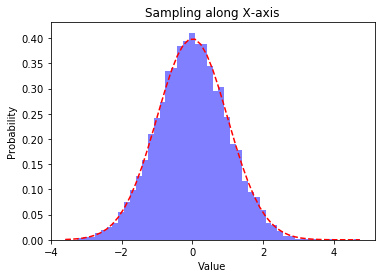

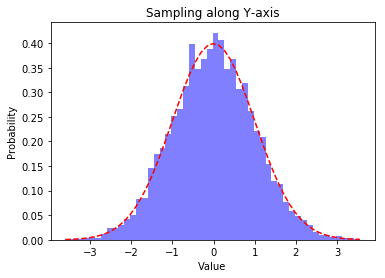

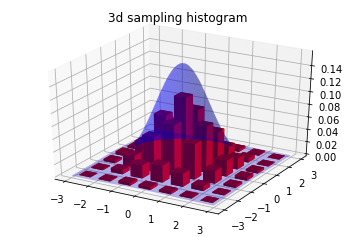

In [133]:
# -*- coding: utf-8 -*-  
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab    
import matplotlib.pyplot as plt    
# transformation function
def gaussian(y1,y2):
    x1 = sqrt(-2*log(y1))*cos(2*pi*y2)
    x2 = sqrt(-2*log(y1))*sin(2*pi*y2)
    return x1,x2

sample_num=10000;



# uniformly distributed values between 0 and 1
u1 = random.rand(sample_num)
u2 = random.rand(sample_num)

# run the transformation
x1,x2 = gaussian(u1,u2)        

# Generate from multivariate guassian 
x, y = np.random.multivariate_normal([0,0], [[1,0],[0,1]], sample_num).T

# Set hitogram bins
num_bins = 50 

# the histogram of the data along one-direction
n, bins, patches = plt.hist(x1, num_bins, normed=1, facecolor='blue', alpha=0.5)    

# add a 'best fit' line
r = mlab.normpdf(bins, 0, 1)    
plt.plot(bins, r, 'r--')    

# plot and save
plt.xlabel('Value')    
plt.ylabel('Probability')    
plt.title(r'Sampling along X-axis')    
plt.subplots_adjust(left=0.15)      
plt.savefig("hist_{}_1.jpg".format(sample_num))  
plt.show()

# along the other direction
n, bins, patches = plt.hist(x2, num_bins, normed=1, facecolor='blue', alpha=0.5)    

# add a 'best fit' line    
r = mlab.normpdf(bins, 0, 1)    
plt.plot(bins, r, 'r--')    

# plot and save
plt.xlabel('Value')    
plt.ylabel('Probability')    
plt.title(r'Sampling along Y-axis')    
plt.subplots_adjust(left=0.15)    
plt.savefig("hist_{}_2.jpg".format(sample_num))  
plt.show()


# draw 3d plot version
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x1, x2, bins=7, range=[[-3,3],[-3,3]])

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1]+0.2 ,yedges[:-1]+0.2)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()/sample_num

# plot 3d histogram 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz,color='r', alpha=0.3,zsort='average')


# plot the numtivariate guassian p.d.f.
xpos, ypos = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
r= mlab.bivariate_normal(xpos,ypos)
ax.set_zlim3d(0,np.max(r))
ax.plot_surface(xpos,ypos,r,color='b',alpha=0.3)

# save the plot
plt.title(r'3d sampling histogram') 
plt.savefig("hist_{}_3.jpg".format(sample_num))
plt.show()
